# MOBILE PROJECT #



# Odometry


In [34]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Node 4083af56-946c-415f-b386-faa372a985fe

In [29]:
await node.unlock()

In [71]:
from threading import Timer

acquire_data = True
Ts = 0.1
thymio_data = []

class RepeatedTimer(object):
    def __init__(self, interval, function, *args, **kwargs):
        self._timer     = None
        self.interval   = interval
        self.function   = function
        self.args       = args
        self.kwargs     = kwargs
        self.is_running = False
        self.start()

    def _run(self):
        self.is_running = False
        self.start()
        self.function(*self.args, **self.kwargs)

    def start(self):
        if not self.is_running:
            self._timer = Timer(self.interval, self._run)
            self._timer.start()
            self.is_running = True

    def stop(self):
        self._timer.cancel()
        self.is_running = False


In [72]:
def motors(left, right):
    return {
        "motor.left.target": [left], #this is the target speed, so the state you predict motor.left.speed  is the speed measured
        "motor.right.target": [right],
    }

def get_data():
    thymio_data.append({"left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})
   

In [37]:

if acquire_data:
    await node.wait_for_variables() # wait for Thymio variables values
    rt = RepeatedTimer(Ts, get_data) # it auto-starts, no need of rt.start(). calls a functio each Ts time. we call 

    try:# is only called if there is no error when called
        # time.sleep would not work here, use asynchronous client.sleep method instead
        await client.sleep(5)
        node.send_set_variables(motors(145, 150)) #make the robot go straight for 25 second the time to cross the parcour
        await client.sleep(19.4) # your long-running job goes here...
    finally:
        rt.stop() # better in a try/finally block to make sure the program ends!
        node.send_set_variables(motors(0, 0))
else:
    thymio_data =  [{'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 0}, {'left_speed': 0, 'right_speed': 4}, {'left_speed': 0, 'right_speed': 4}, {'left_speed': 36, 'right_speed': 32}, {'left_speed': 41, 'right_speed': 40}, {'left_speed': 53, 'right_speed': 41}, {'left_speed': 53, 'right_speed': 41}, {'left_speed': 54, 'right_speed': 42}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 53}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 47}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 53}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 53, 'right_speed': 49}, {'left_speed': 53, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 47}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 56, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 53, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 53, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 47}, {'left_speed': 54, 'right_speed': 47}, {'left_speed': 55, 'right_speed': 47}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 53, 'right_speed': 47}, {'left_speed': 56, 'right_speed': 50}, {'left_speed': 56, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 53}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 47}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 47}, {'left_speed': 55, 'right_speed': 47}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 47}, {'left_speed': 54, 'right_speed': 47}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 56, 'right_speed': 52}, {'left_speed': 56, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 46}, {'left_speed': 55, 'right_speed': 46}, {'left_speed': 55, 'right_speed': 47}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 56, 'right_speed': 52}, {'left_speed': 56, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 53, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 56, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 47}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 46}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 54}, {'left_speed': 55, 'right_speed': 53}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 54, 'right_speed': 51}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 47}, {'left_speed': 56, 'right_speed': 50}, {'left_speed': 56, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 55, 'right_speed': 53}, {'left_speed': 55, 'right_speed': 53}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 54}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 54, 'right_speed': 49}, {'left_speed': 56, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 51}, {'left_speed': 53, 'right_speed': 51}, {'left_speed': 53, 'right_speed': 51}, {'left_speed': 56, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 48}, {'left_speed': 57, 'right_speed': 52}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 56, 'right_speed': 47}, {'left_speed': 56, 'right_speed': 47}, {'left_speed': 54, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 50}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 49}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 55, 'right_speed': 52}, {'left_speed': 56, 'right_speed': 51}]

In [68]:
thymio_data[100["right_speed"]

152

Length thymio_data: 280
Speed_mms: 21.73913043478261 mm/s


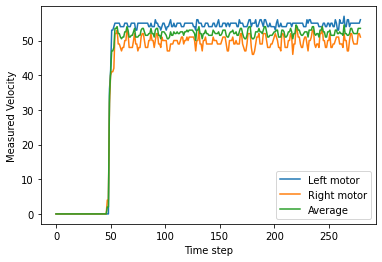

In [22]:
print("Length thymio_data:", len(thymio_data))
#print("Thymio data:\n", thymio_data)

import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
from tqdm import tqdm

l_speed = [x["left_speed"] for x in thymio_data]
r_speed = [x["right_speed"] for x in thymio_data]
avg_speed = [(x["left_speed"]+x["right_speed"])/2 for x in thymio_data]
plt.plot(l_speed, label="Left motor")
plt.plot(r_speed, label="Right motor")
plt.plot(avg_speed, label="Average")
plt.xlabel("Time step")
plt.ylabel("Measured Velocity")
plt.legend()

print("Speed_mms: "+ str(50 *thymio_speed_to_mms) +" mm/s")

Serie 8 kalman pour calculer K_vitesse: ####150 

- avec technique des pic a 150,   K = 0.333333333
- en calulant en combien de temps un metre est parcouru:  0.3436426116838488 

vitesse= 1000*1000/(1940*timer_period[0])
print(vitesse)

thymio_speed_to_mms = vitesse/150
thymio_speed_to_mms

(1940*timer_period[0])/1000

alpha = (360+180)*1000/(8873*5)

k = alpha/(200)

k*300

# Extended Kalman filter

In [69]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

Exception: Node lock error

In [70]:
import numpy as np
# Description: Extended Kalman Filter example (two-wheeled mobile robot)

# Supress scientific notation when printing NumPy arrays
np.set_printoptions(precision=3,suppress=True)
 
# A matrix
A_k_minus_1 = np.array([[1.0,  0,   0],
                       [  0, 1.0,   0],
                       [  0,   0, 1.0]])

# 
process_noise_v_k_minus_1 = np.array([0.01,0.01,0.003])
     
# State model noise covariance matrix Q_k
Q_k = np.array([[1.0,   0,   0],
                [  0, 1.0,   0],
                [  0,   0, 1.0]])
                 
# Measurement matrix H_k
H_k = np.array([[1.0,  0,   0],
                [  0,1.0,   0],
                [  0,  0, 1.0]])
                         
# Sensor measurement noise covariance matrix R_k
R_k = np.array([[1.0,   0,    0],
                [  0, 1.0,    0],
                [  0,    0, 1.0]])  
                 
# Sensor noise
sensor_noise_w_k = np.array([0.07,0.07,0.04])
 
def getB(yaw, deltak):
    """
    # Author: Addison Sears-Collins
    # https://automaticaddison.com
    Calculates and returns the B matrix
    3x2 matix -> number of states x number of control inputs
    The control inputs are the forward speed and the
    rotation rate around the z axis from the x-axis in the 
    counterclockwise direction.
    [v,yaw_rate]
    Expresses how the state of the system [x,y,yaw] changes
    from k-1 to k due to the control commands (i.e. control input).
    :param yaw: The yaw angle (rotation angle around the z axis) in rad 
    :param deltak: The change in time from time step k-1 to k in sec
    """
    B = np.array([  [np.cos(yaw)*deltak, 0],
                    [np.sin(yaw)*deltak, 0],
                    [0, deltak]])
    return B
 
def ekf(z_k_observation_vector, state_estimate_k_minus_1, 
        control_vector_k_minus_1, P_k_minus_1, dk):
    """
    # Author: Addison Sears-Collins
    # https://automaticaddison.com
    Extended Kalman Filter. Fuses noisy sensor measurement to 
    create an optimal estimate of the state of the robotic system.
         
    INPUT
        :param z_k_observation_vector The observation from the Odometry
            3x1 NumPy Array [x,y,yaw] in the global reference frame
            in [meters,meters,radians].
        :param state_estimate_k_minus_1 The state estimate at time k-1
            3x1 NumPy Array [x,y,yaw] in the global reference frame
            in [meters,meters,radians].
        :param control_vector_k_minus_1 The control vector applied at time k-1
            3x1 NumPy Array [v,v,yaw rate] in the global reference frame
            in [meters per second,meters per second,radians per second].
        :param P_k_minus_1 The state covariance matrix estimate at time k-1
            3x3 NumPy Array
        :param dk Time interval in seconds
             
    OUTPUT
        :return state_estimate_k near-optimal state estimate at time k  
            3x1 NumPy Array ---> [meters,meters,radians]
        :return P_k state covariance_estimate for time k
            3x3 NumPy Array                 
    """
    ######################### Predict #############################
    # Predict the state estimate at time k based on the state 
    # estimate at time k-1 and the control input applied at time k-1.
    state_estimate_k = A_k_minus_1 @ (
            state_estimate_k_minus_1) + (
            getB(state_estimate_k_minus_1[2],dk)) @ (
            control_vector_k_minus_1) + (
            process_noise_v_k_minus_1)
             
    print(f'X_est State Estimate Before EKF={state_estimate_k}')
             
    # Predict the state covariance estimate based on the previous
    # covariance and some noise
    P_k = A_k_minus_1 @ P_k_minus_1 @ A_k_minus_1.T + (
            Q_k)
         
    ################### Update (Correct) ##########################
    # Calculate the difference between the actual sensor measurements
    # at time k minus what the measurement model predicted 
    # the sensor measurements would be for the current timestep k.
    measurement_residual_y_k = z_k_observation_vector - (
            (H_k @ state_estimate_k) + (
            sensor_noise_w_k))
 
    print(f'Z Measurements={z_k_observation_vector}')
             
    # Calculate the measurement residual covariance
    S_k = H_k @ P_k @ H_k.T + R_k
         
    # Calculate the near-optimal Kalman gain
    # We use pseudoinverse since some of the matrices might be
    # non-square or singular.
    K_k = P_k @ H_k.T @ np.linalg.pinv(S_k)
         
    # Calculate an updated state estimate for time k
    state_estimate_k = state_estimate_k + (K_k @ measurement_residual_y_k)
     
    # Update the state covariance estimate for time k
    P_k = P_k - (K_k @ H_k @ P_k)
     
    # Print the best (near-optimal) estimate of the current state of the robot
    print(f'X_est State Estimate After EKF={state_estimate_k}')
 
    # Return the updated state and covariance estimates
    return state_estimate_k, P_k
     
def Kalman(v_right,v_left,z_t,dt):
    
    #odometry
    thymio_v_to_mms = 0.34 # (0.3436426116838488 ou  0.333333333)
    thymio_y_to_mms = 0.06085878507832751
    offset = 5
    
    v_right = thymio_v_to_mms * v_right
    v_left = thymio_v_to_mms *v_left - offset
    
    v = (v_right + v_left)/2
    yaw_rate = (v_right - v_left)*thymio_y_to_mms
    
 
    # We start at time t=1
    t = 1
                     
    # The estimated state vector at time t-1 in the global reference frame.
    # [x_t_minus_1, y_t_minus_1, yaw_t_minus_1]
    # [meters, meters, radians]
    x_est_t_minus_1 = np.array([0.0,0.0,0.0])
     
    # The control input vector at time t-1 in the global reference frame.
    # [v, yaw_rate]
    # [meters/second, radians/second]
    # In the literature, this is commonly u.
    # Because there is no angular velocity and the robot begins at the 
    # origin with a 0 radians yaw angle, this robot is traveling along 
    # the positive x-axis in the global reference frame.
    u_t_minus_1 = np.array([v ,yaw_rate])
     
    # State covariance matrix P_t_minus_1
    # This matrix has the same number of rows (and columns) as the 
    # number of states (i.e. 3x3 matrix). P is sometimes referred
    # to as Sigma in the literature. It represents an estimate of 
    # the accuracy of the state estimate at time t made using the
    # state transition matrix. We start off with guessed values.
    P_t_minus_1 = np.array([[0.1,  0,   0],
                            [  0,0.1,   0],
                            [  0,  0, 0.1]])
                             
    # Start at t=1 and go through each of the 5 sensor observations, 
    # one at a time. 
    # We stop right after timestep t=5 (i.e. the last sensor observation)
    for t, obs_vector_z_t in enumerate(z_t,start=1):
        
        # Print the current timestep
        print(f'Timestep t={t}') 
        print(f'Timestep measurement={obs_vector_z_t}')
         
        # Run the Extended Kalman Filter and store the 
        # near-optimal state and covariance estimates
        optimal_state_estimate_t, covariance_estimate_t = ekf(
            obs_vector_z_t, # Most recent sensor measurement
            x_est_t_minus_1, # Our most recent estimate of the state
            u_t_minus_1, # Our most recent control input
            P_t_minus_1, # Our most recent state covariance matrix
            dt) # Time interval
         
        # Get ready for the next timestep by updating the variable values
        x_est_t_minus_1 = optimal_state_estimate_t
        P_t_minus_1 = covariance_estimate_t
         
        # Print a blank line
        print()
 
# Program starts running here with the main method  

In [57]:
def get_data():
    thymio_data.append({"left_speed":node["motor.left.speed"],
                        "right_speed":node["motor.right.speed"]})

In [ ]:
thymio_data[100]["right_speed"]

In [56]:

    #################### PARAMS ###################
    v_right = -100
    v_left = 100
        
    # Create a list of sensor observations at successive timesteps
    # Each list within z_t is an observation vector.
    ## [x, y, yaw]
    #METTRE VALEURES ELIOT!!
    z_t = np.array([[4.721,0.143,0.006], # k=1
                    [9.353,0.284,0.007], # k=2
                    [14.773,0.422,0.009],# k=3
                    [18.246,0.555,0.011], # k=4
                    [22.609,0.715,0.012]])# k=5
    
    # Time interval in seconds
    dt = 1
    ################################################
 


In [52]:
Kalman(v_right,v_left,z_t,dt)

Timestep t=1
Timestep measurement=[4.721 0.143 0.006]
X_est State Estimate Before EKF=[-2.49   0.01  -3.831]
Z Measurements=[4.721 0.143 0.006]
X_est State Estimate After EKF=[ 1.251  0.043 -1.842]

Timestep t=2
Timestep measurement=[9.353 0.284 0.007]
X_est State Estimate Before EKF=[ 1.931  2.462 -5.673]
Z Measurements=[9.353 0.284 0.007]
X_est State Estimate After EKF=[ 6.37   1.105 -2.268]

Timestep t=3
Timestep measurement=[14.773  0.422  0.009]
X_est State Estimate Before EKF=[ 7.985  3.031 -6.099]
Z Measurements=[14.773  0.422  0.009]
X_est State Estimate After EKF=[12.123  1.381 -2.361]

Timestep t=4
Timestep measurement=[18.246  0.555  0.011]
X_est State Estimate Before EKF=[13.91   3.15  -6.193]
Z Measurements=[18.246  0.555  0.011]
X_est State Estimate After EKF=[16.545  1.504 -2.385]

Timestep t=5
Timestep measurement=[22.609  0.715  0.012]
X_est State Estimate Before EKF=[18.373  3.229 -6.216]
Z Measurements=[22.609  0.715  0.012]
X_est State Estimate After EKF=[20.948  1.

In [74]:
await node.unlock()

{'error_code': 2}

Exception in thread Exception in thread Exception in thread Exception in thread Exception in thread Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\threading.py", line 973, in _bootstrap_inner
Thread-294Thread-990:
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\threading.py", line 973, in _bootstrap_inner
Exception in thread :
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-298:
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\threading.py", line 973, in _bootstrap_inner
Thread-296:
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\threading.py", line 973, in _bootstrap_inner
Thread-994:
Traceback (most recent call last):
  File "C:\Program Files\Python39\lib\threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-992:
Traceback (most recent call la

        
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote hostreturn self.socket.recv(n)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
return self.socket.recv(n)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

